#Importing

In [17]:
# libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# functions:
from sklearn.model_selection import train_test_split                                            #split data 
from sklearn.svm import SVC                                                                     #SVC classifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score     #metrics 
from sklearn.dummy import DummyClassifier                                                       #Dummy classifier
from mlxtend.plotting import plot_learning_curves                                               #learning curves
from sklearn.model_selection import cross_val_score                                             #cross-validation

In [18]:
df = pd.read_csv('final_dataset.csv')                               #reading dataset

###Selecting columns and splitting data

In [19]:
# defining features names
features = list(df.columns)

In [20]:
target = "class"                                                    #target name
y = df[target].values                                               #target values
features.remove(target)                                             #removing target from features
x = df[features].values                                             #feature values

# splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

#Training Classifier

In [21]:
# Training the Support Vector Classifier on the training set
classifier = SVC(C = 1.0, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [22]:
# Predicting the test set results
y_pred = classifier.predict(x_test)
print(y_pred)

[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1.]


#Evaluating

Dummy classifier

In [23]:
dummy_clf = DummyClassifier(strategy = 'stratified').fit(x_train, y_train) #dummy classifier with stratified rule
y_dummy_predictions = dummy_clf.predict(x_test)                            #making predictions with dummy classifier

y_dummy_predictions

array([0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1.])

In [24]:
dummy_clf.score(x_test, y_test)                 #accuracy score of dummy classifier


0.5288461538461539

In [25]:
precision_score(y_dummy_predictions, y_test)    #precision score of dummy classifier

0.609375

In [26]:
recall_score(y_dummy_predictions, y_test)       #recall score of dummy classifier

0.609375

Train and test accuracy

In [27]:
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(classifier.score(x_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(classifier.score(x_test, y_test)))

Accuracy of SVC classifier on training set: 0.88
Accuracy of SVC classifier on test set: 0.93


Confusion matrix

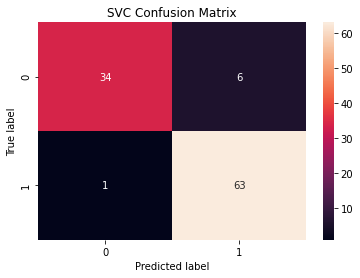

In [28]:
# Making the confusion matrix:
cm = confusion_matrix(y_test, y_pred)       #calculating (TP, TN, Fp and FN) 

df_cm = pd.DataFrame(cm)                    #transforming into a pd.DataFrame
sns.heatmap(df_cm, annot=True)              #plotting
plt.title('SVC Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.savefig('image17.png')

Curves

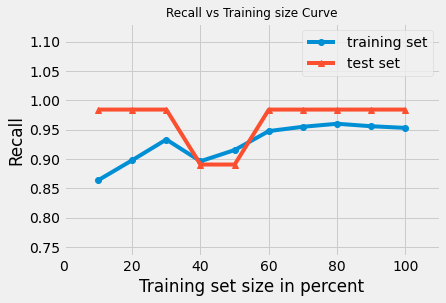

In [29]:
plot_learning_curves(x_train, y_train, x_test, y_test, classifier, scoring='recall', print_model=False)
plt.title('Recall vs Training size Curve')
plt.ylabel('Recall')
#plt.savefig('image18.png')
plt.show()

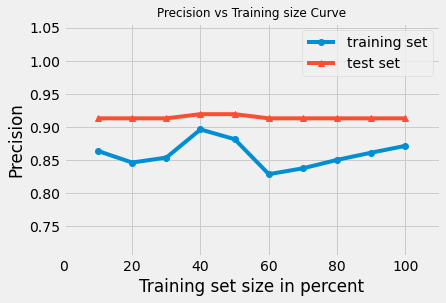

In [30]:
plot_learning_curves(x_train, y_train, x_test, y_test, classifier, scoring='precision', print_model=False)
plt.title('Precision vs Training size Curve')
plt.ylabel('Precision')
#plt.savefig('image19.png')
plt.show()

Cross-validation

In [31]:
precision = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5, scoring='precision')

print("Precision: {:.2f} %".format(precision.mean()*100))
print("Standard Deviation: {:.2f} %".format(precision.std()*100))

Precision: 87.62 %
Standard Deviation: 6.07 %


In [32]:
recall = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5, scoring='recall')

print("Recall: {:.2f} %".format(recall.mean()*100))
print("Standard Deviation: {:.2f} %".format(recall.std()*100))

Recall: 95.33 %
Standard Deviation: 3.58 %
